<a href="https://colab.research.google.com/github/Anoop96/ML-Algo-implementation-using-Sklearn-Toy_datasets/blob/master/Regression_model_Selection_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set used here was from 


---


**Combined Cycle Power Plant Data Set**

# Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data

In [2]:
data = pd.read_csv('Data.csv')
data.shape

(9568, 5)

In [0]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [7]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [8]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


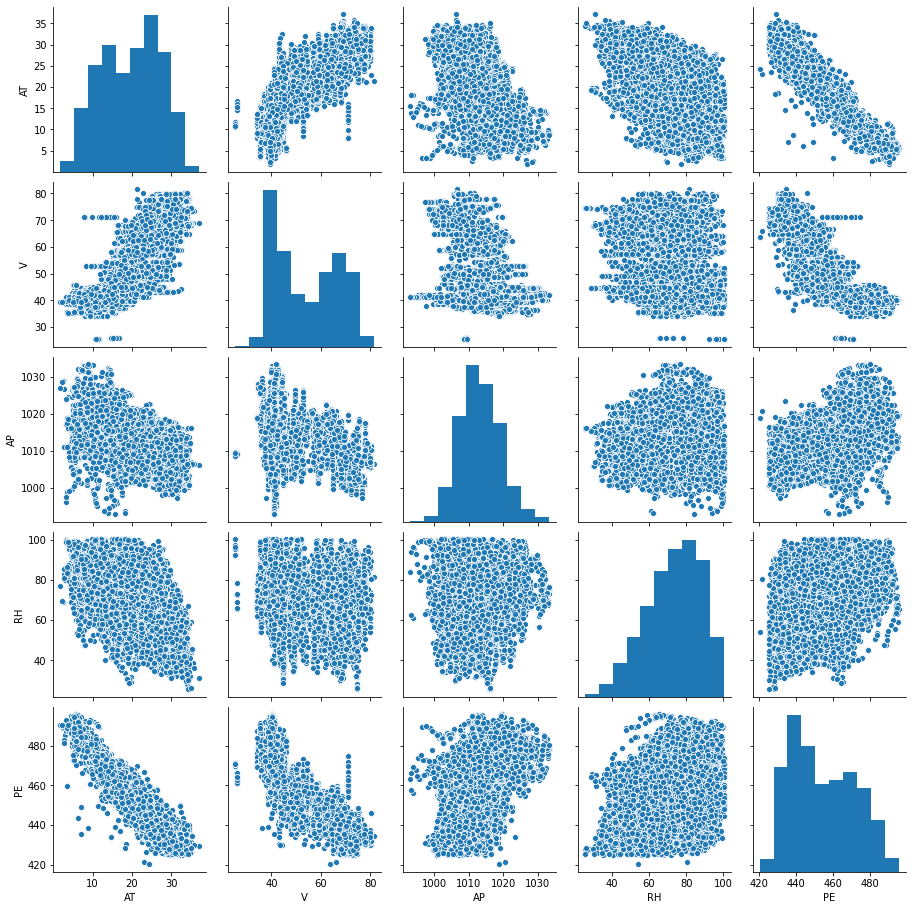

In [9]:
import seaborn as sns
sns.pairplot(data)

# Split the data into trainset and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
print(len(X_train),len(X_test))

7654 1914


# Multiple Linear Regression

### Training the Multiple regression on the dataset 

In [30]:
from sklearn.linear_model import LinearRegression
mul_regressor = LinearRegression()
mul_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### predicting the test set result

In [31]:
y_pred = mul_regressor.predict(X_test)
np.vstack([y_pred,y_test]).T

array([[431.42761597, 431.23      ],
       [458.56124622, 460.01      ],
       [462.75264705, 461.14      ],
       ...,
       [469.51835895, 473.26      ],
       [442.41759454, 438.        ],
       [461.88279939, 463.28      ]])

### Multiple Linear Regression model Evaluation

In [32]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9277905636321646

# Polynomial Regression

### Training the Model

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X_train)

poly_regress = LinearRegression()
poly_regress.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the results

In [35]:
y_pred1 = poly_regress.predict(poly_reg.transform(X_test))
print(y_pred1)

[433.94373404 457.9046154  460.5246763  ... 469.52898652 438.26543378
 461.66494579]


In [36]:
np.vstack([y_pred1,y_test]).T

array([[433.94373404, 431.23      ],
       [457.9046154 , 460.01      ],
       [460.5246763 , 461.14      ],
       ...,
       [469.52898652, 473.26      ],
       [438.26543378, 438.        ],
       [461.66494579, 463.28      ]])

### Model Evaluation

In [37]:
from sklearn.metrics import r2_score
r2_score(y_pred1,y_test)

0.9425115817622165

# Support Vector Regression

### Feature Scaling

In [0]:

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
scaled_X_train = sc_x.fit_transform(X_train)
scaled_y_train = sc_y.fit_transform(y_train.reshape(len(y_train),1))
# print(scales_X_train)

### Training the Model

In [42]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(scaled_X_train,scaled_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting the Result

In [43]:
y_pred_svr = sc_y.inverse_transform(svr_reg.predict(sc_x.transform(X_test)))
print(y_pred_svr)

[434.05242921 457.93810186 461.03113894 ... 470.60268461 439.41653548
 460.91757115]


In [45]:
np.vstack([y_pred_svr,y_test]).T

array([[434.05242921, 431.23      ],
       [457.93810186, 460.01      ],
       [461.03113894, 461.14      ],
       ...,
       [470.60268461, 473.26      ],
       [439.41653548, 438.        ],
       [460.91757115, 463.28      ]])

### Model Evaluation

In [46]:
r2_score(y_pred_svr,y_test)

0.9462379188596809

# Decision Tree Regression


### Model Training

In [48]:
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor(random_state=0)
decision_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

### Prediction on Test set

In [49]:
y_pred = decision_reg.predict(X_test)

[431.28 462.81 460.06 ... 471.46 437.76 462.55]


In [50]:
np.vstack([y_pred,y_test]).T

array([[431.28, 431.23],
       [462.81, 460.01],
       [460.06, 461.14],
       ...,
       [471.46, 473.26],
       [437.76, 438.  ],
       [462.55, 463.28]])

### Model Evaluation

In [51]:
r2_score(y_pred,y_test)

0.9212071233241356

# Random Forest Regression

### Train the ensemble model 

In [52]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10,random_state=0)
forest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Predict the Outcomes

In [0]:
y_pred = forest_reg.predict(X_test)

In [55]:
np.stack([y_pred,y_test]).T

array([[433.778, 431.23 ],
       [457.987, 460.01 ],
       [463.143, 461.14 ],
       ...,
       [470.156, 473.26 ],
       [439.511, 438.   ],
       [460.316, 463.28 ]])

### Model Evaluation

In [56]:
r2_score(y_pred,y_test)

0.9599654651764917

###### This can be clearly concluded that Random Forest out perform all other type of Regression Algorithms. R2_squared is the Evaluation metric we are using to compare them. These algorithm can be still hypertuned to give better result, which will be done later in the progression.